## Import the packages and modules


In [1]:
from pca import *
%reload_ext autoreload
%autoreload 2

## Task 1, Part 1, PCA dataset
#### Read the dataset and transform the format to numpy array
#### Visualize the 2 dimensional input dataset

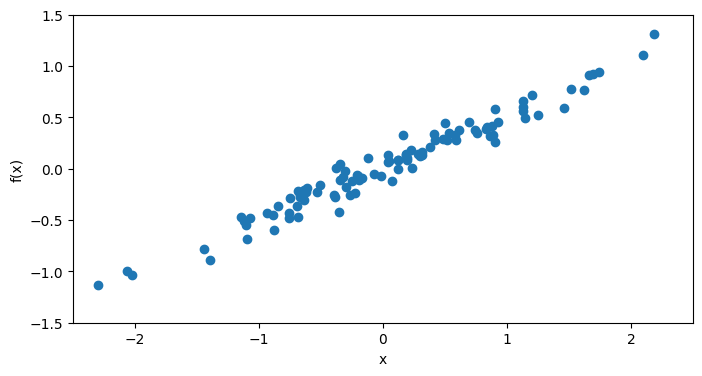

In [2]:
x = read_file("pca_dataset.txt")
vis(x)

#### Compare the original dataset to the centered dataset

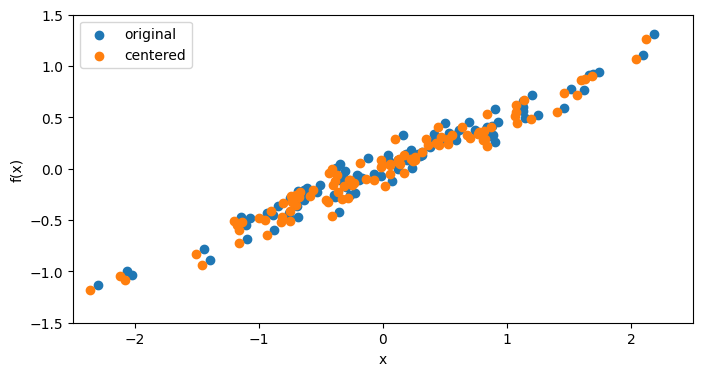

In [3]:
pca = PCA(x)
x_centered = pca.center_data(x)
vis_compare(x,x_centered)

#### Perform PCA algorithm on original dataset 

In [4]:
u,s,vh = pca.pca_cal(x)

#### Calculate the energy of the first component as required

In [5]:
pca.energy_calculation(s, 1)

'The energy resulting from the given number of principal components is 99.31426561434292 %'

#### Visualize the eigenvectors on the centered  dataset

In [6]:
vh.T

array([[-0.88938337,  0.45716213],
       [-0.45716213, -0.88938337]])

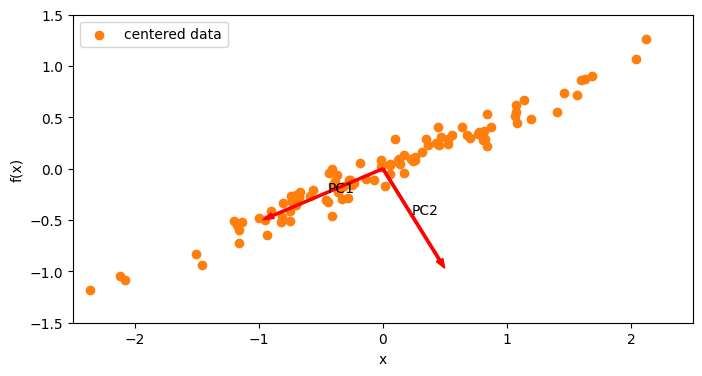

In [7]:
vis_pc(x_centered,vh)

#### The original dataset after multiplying with eigenvectors

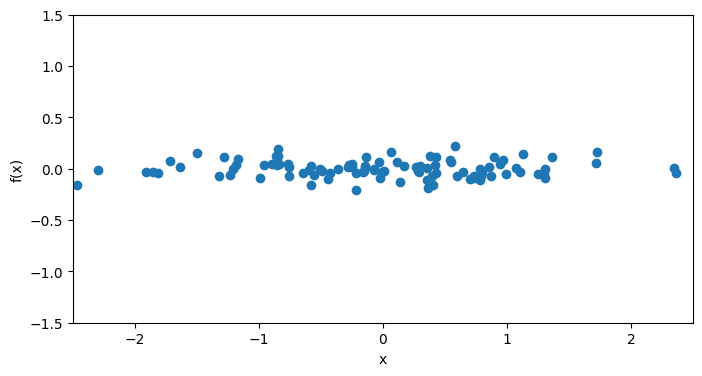

In [8]:
x_full_components = x_centered@vh.T
vis(x_full_components)

#### The reconstructed dataset with respect to the first principal component

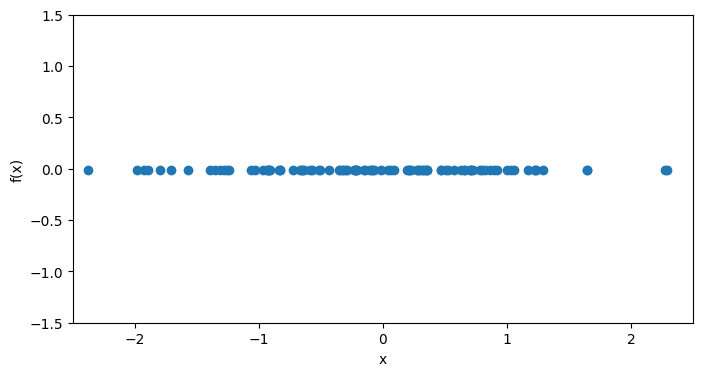

In [9]:
x_reconstructed = pca.pca_reconstruction(u,s,vh,r=1)
vis(x_reconstructed@vh.T)

## Part 2, Racoon image
#### Load, reshape and visualize the gray image

In [10]:
#load the image and rescale to size (249,185)
image = load_image()
image.shape

(185, 249)

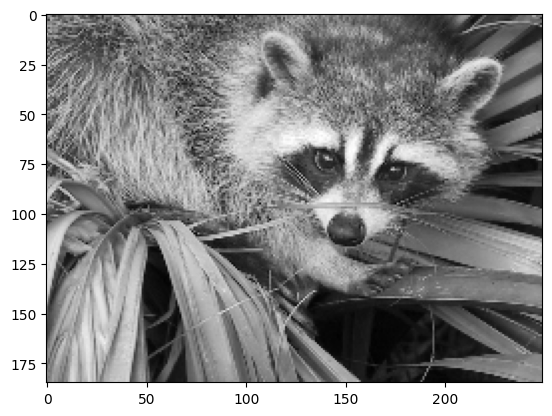

In [11]:
vis_image(image)

#### New pca object of the image and perform pca on it

In [12]:
pca_img = PCA(image)
u_img, s_img, vh_img = pca_img.pca_cal(image)

#### Reconstruct the image based on the required different number of principal components

In [13]:
image_reconstructed_all = pca_img.pca_reconstruction(u_img, s_img, vh_img, r = s_img.shape[0])
image_reconstructed_120 = pca_img.pca_reconstruction(u_img, s_img, vh_img, r = 120)
image_reconstructed_50 = pca_img.pca_reconstruction(u_img, s_img, vh_img, r = 50)
image_reconstructed_10 = pca_img.pca_reconstruction(u_img, s_img, vh_img, r = 10)

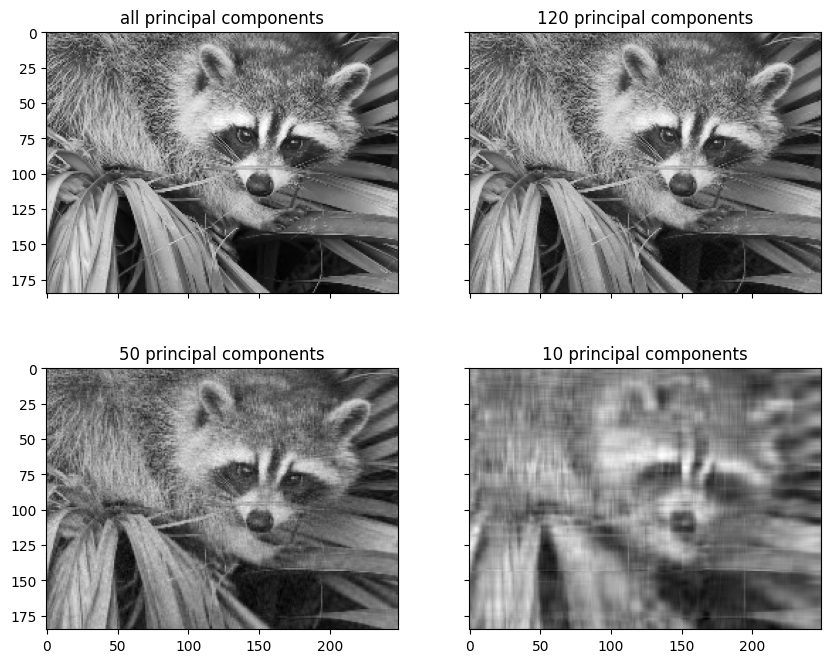

In [14]:
vis_images(image_reconstructed_all,image_reconstructed_120,image_reconstructed_50,image_reconstructed_10)

#### Energy calculation 

Text(0.5, 1.0, 'Remaining energy corresponding to different principal components')

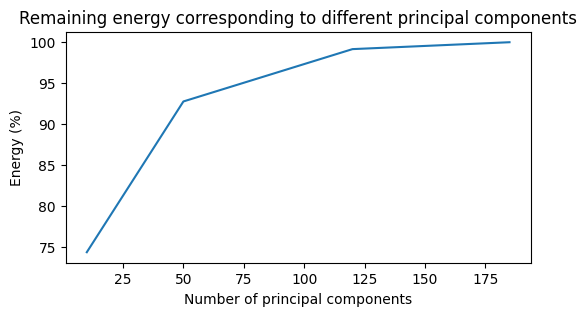

In [15]:
energy_all = pca_img.energy_calculation(s_img, s_img.shape[0], sentence = False)
energy_120 = pca_img.energy_calculation(s_img, 120, sentence = False)
energy_50 = pca_img.energy_calculation(s_img, 50, sentence = False)
energy_10 = pca_img.energy_calculation(s_img, 10, sentence = False)
pc = [s_img.shape[0], 120, 50, 10]
energy = [energy_all, energy_120, energy_50, energy_10]
plt.figure(figsize=(6,3))
plt.plot(pc, energy)
plt.xlabel("Number of principal components")
plt.ylabel("Energy (%)")
plt.title("Remaining energy corresponding to different principal components")

#### Find the smallest number of components that has less than 1% energy loss

In [16]:
pca_img.energy_calculation(s_img, 115)

'The energy resulting from the given number of principal components is 98.97946242756719 %'

In [17]:
pca_img.energy_calculation(s_img, 116)

'The energy resulting from the given number of principal components is 99.01712449780361 %'

## Part3, data_DMAP_PCA_vadere
#### Read and visualize the original data

In [18]:
peds = read_file("data_DMAP_PCA_vadere.txt")
peds.shape

(1000, 30)

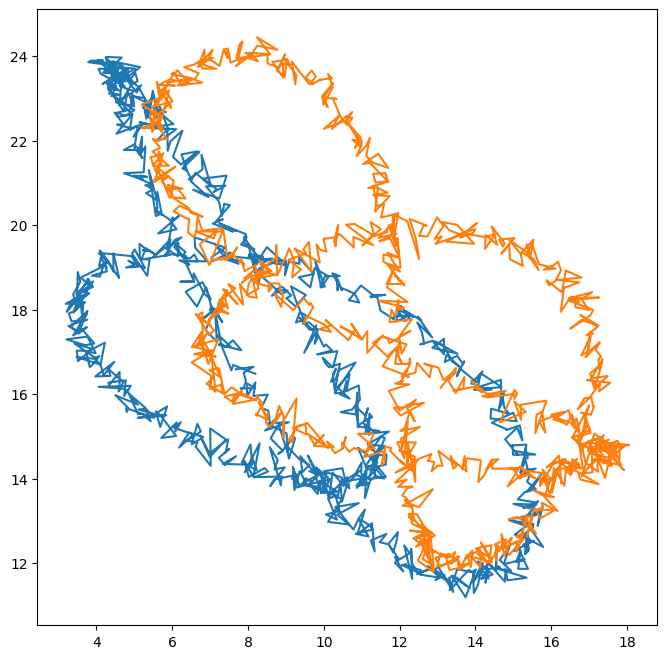

In [19]:
vis_path(peds)

#### Perform PCA on the dataset

In [20]:
pca_peds = PCA(peds)
u_peds, s_peds, vh_peds = pca_peds.pca_cal(peds)

#### Try 3 different number of principal components 1, 2 and 3

In [21]:
peds_reconstructed_1 = pca_peds.pca_reconstruction(u_peds, s_peds, vh_peds, r = 1)
peds_reconstructed_2 = pca_peds.pca_reconstruction(u_peds, s_peds, vh_peds, r = 2)
peds_reconstructed_3 = pca_peds.pca_reconstruction(u_peds, s_peds, vh_peds, r = 3)

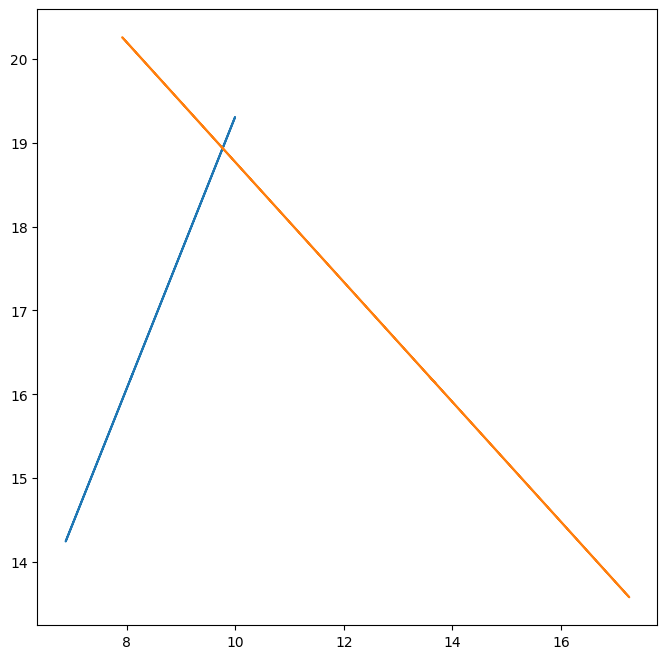

In [22]:
#vis_paths(peds_reconstructed_1,peds_reconstructed_2,peds_reconstructed_3)
vis_path(peds_reconstructed_1)

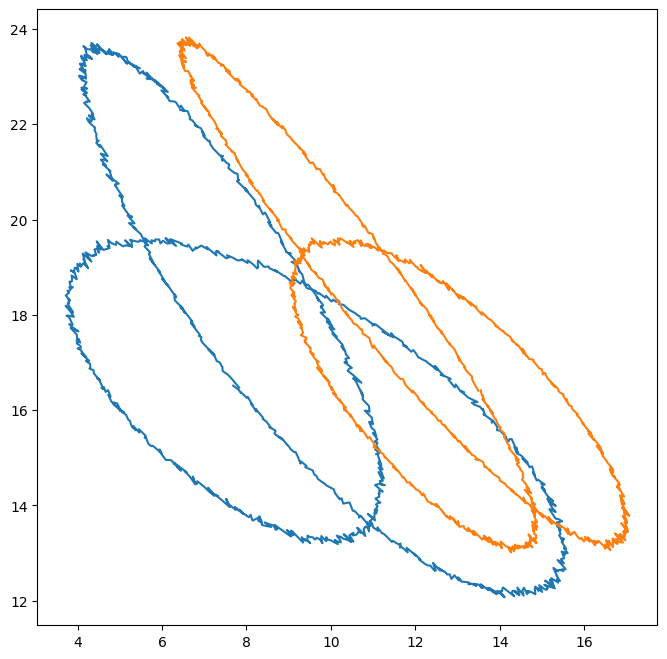

In [23]:
vis_path(peds_reconstructed_2)

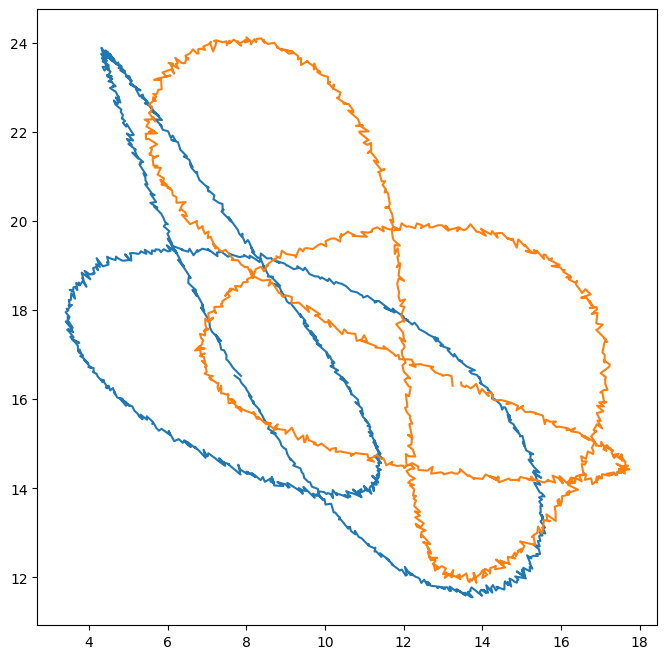

In [24]:
vis_path(peds_reconstructed_3)

In [25]:
pca_peds.energy_calculation(s_peds, 1)

'The energy resulting from the given number of principal components is 47.33056127498327 %'

In [26]:
pca_peds.energy_calculation(s_peds, 2)

'The energy resulting from the given number of principal components is 84.92464226063755 %'

In [27]:
pca_peds.energy_calculation(s_peds, 3)

'The energy resulting from the given number of principal components is 99.713103412993 %'

#### Visualize the results of all 15 pedestrians

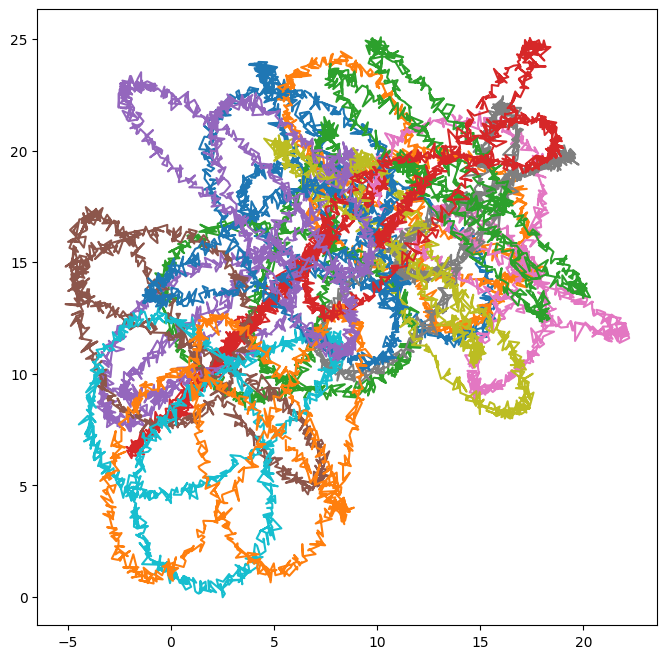

In [28]:
vis_all_paths(peds)

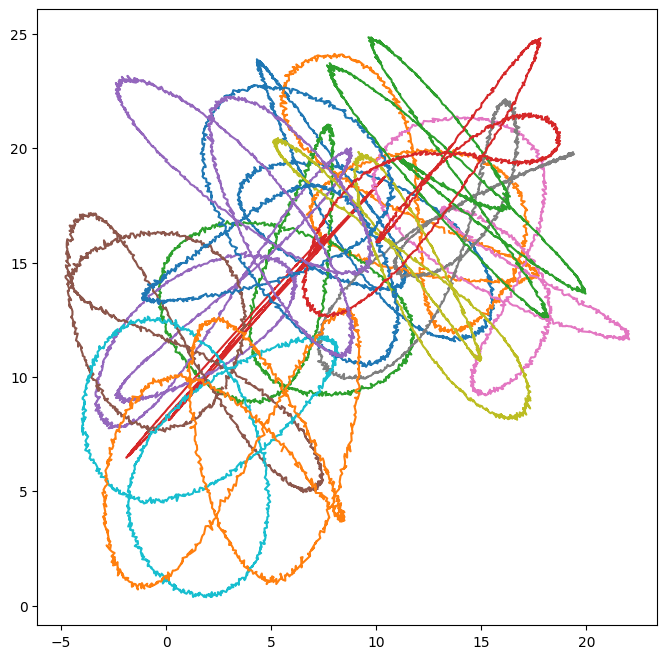

In [29]:
vis_all_paths(peds_reconstructed_3)